In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

In [9]:
df=pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [10]:
df=df.drop(columns=['company_name','year'])

In [11]:
df.head()

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  object 
 1   X1            78682 non-null  float64
 2   X2            78682 non-null  float64
 3   X3            78682 non-null  float64
 4   X4            78682 non-null  float64
 5   X5            78682 non-null  float64
 6   X6            78682 non-null  float64
 7   X7            78682 non-null  float64
 8   X8            78682 non-null  float64
 9   X9            78682 non-null  float64
 10  X10           78682 non-null  float64
 11  X11           78682 non-null  float64
 12  X12           78682 non-null  float64
 13  X13           78682 non-null  float64
 14  X14           78682 non-null  float64
 15  X15           78682 non-null  float64
 16  X16           78682 non-null  float64
 17  X17           78682 non-null  float64
 18  X18           78682 non-nu

In [13]:
df.shape

(78682, 19)

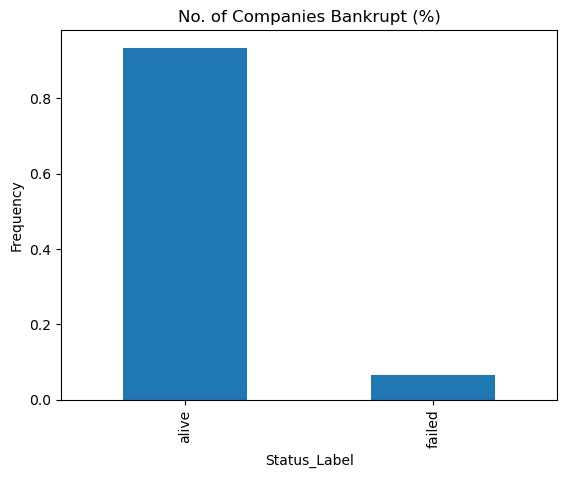

In [14]:
df['status_label'].value_counts(normalize=True).plot(kind='bar',xlabel='Status_Label', ylabel='Frequency', title='No. of Companies Bankrupt (%)');

## Model 2 
## KNN

In [16]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
          'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = df['status_label'].map({'alive': 1, 'failed': 0})

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (62945, 18)
Testing set shape: (15737, 18)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
k_values = list(range(1, 21, 2))  
accuracy_scores = []

In [21]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

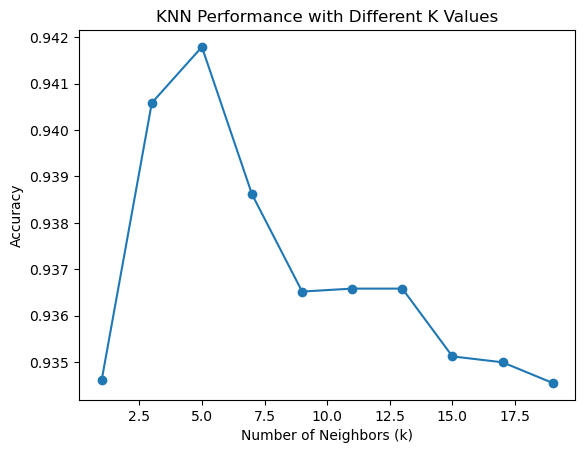

In [22]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Performance with Different K Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [23]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy,4))

0.9418


In [26]:
precision = precision_score(y_test, y_pred, average=None)
print(round(precision[1],4))

0.9488


In [27]:
recall = recall_score(y_test, y_pred, average=None)
print(round(recall[1],4))

0.9912


In [28]:
f1 = f1_score(y_test, y_pred, average=None)
print(round(f1[1],4))

0.9695


In [29]:
roc_auc = roc_auc_score(y_test, y_prob)
print(round(roc_auc,4))

0.7951


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[  258   786]
 [  130 14563]]


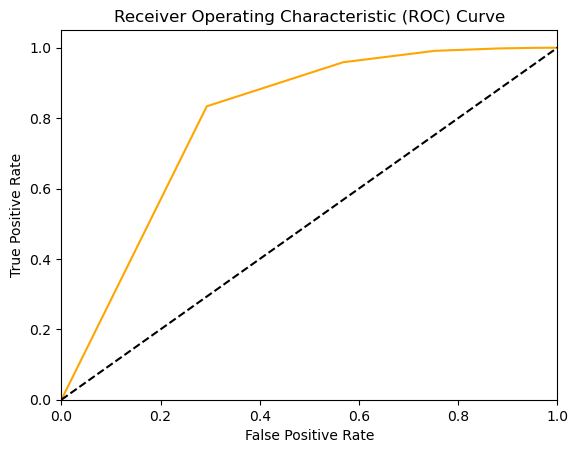

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()